## Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

## Helper Methods

In [2]:
def vertical_sum(row):
    ret = []
    for i in range(1,17):
        cur_sum = 0
        for j in range(16):
            cur_sum += row[(i + 16*j)]
        ret.append(cur_sum/16)
    return ret

In [3]:
def normalize(arr,a,b):
    mn = min(arr)
    mx = max(arr)
    norm_arr = []
    for x in arr:
        cur = x - mn
        cur *= (b - a)
        cur /= mx - mn
        cur += a
        norm_arr.append(cur)
    return norm_arr

In [4]:
cols = []
for i in range(16):
    cols.append('col_'+str(i+1))

## Data Import and Train-Test Split

In [5]:
data = pd.read_csv('../input/data.csv',header=None,sep=' ')
data = data.drop([257],axis=1)
data = data.rename({0:'num'},axis=1)
data = data.loc[data.num.isin([1.0,5.0])]
data = data.sample(frac=1,random_state=1).reset_index(drop=True)
df = data.loc[0:int(0.2*len(data))-1].reset_index(drop=True)
df_test = data.loc[int(0.2*len(data)):].reset_index(drop=True)
len(df),len(df_test),len(data)

(312, 1249, 1561)

## Extract kPCA Features and Scatter Plot

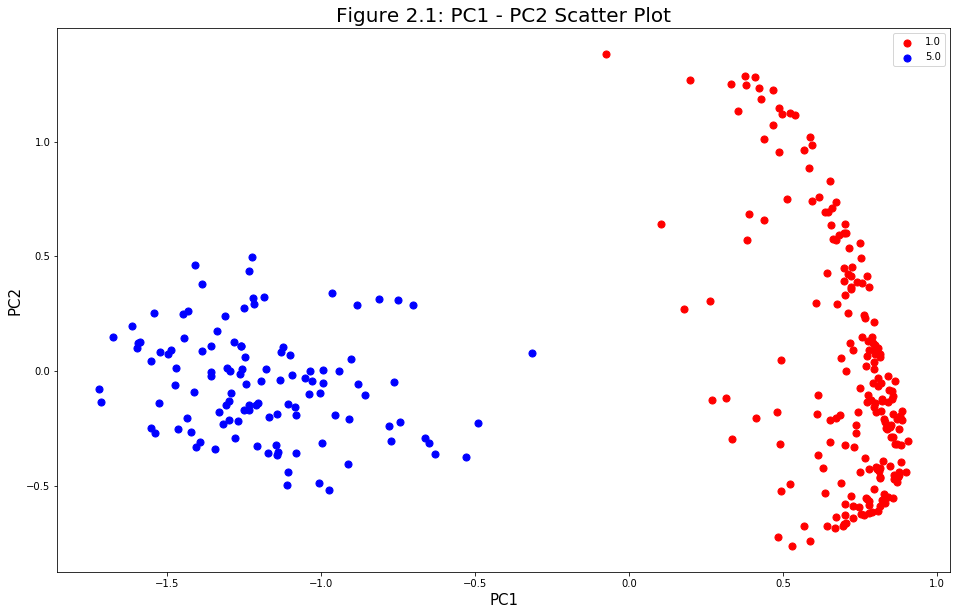

array([[0.        , 1.88538769],
       [1.88538769, 0.        ]])

In [6]:
transformer = KernelPCA(kernel='poly',n_components=2,random_state=0)
df_pca = pd.DataFrame(transformer.fit_transform(df.iloc[:,1:]), columns=['pc1','pc2'])
df_pca['num'] = df['num']
scatter_x = np.array(df_pca['pc1'])
scatter_y = np.array(df_pca['pc2'])
group = np.array(df_pca.num)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.1: PC1 - PC2 Scatter Plot',fontsize=20)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.xlabel('PC1', fontsize=15)
plt.ylabel('PC2', fontsize=15)
ax.legend()
plt.show()
fig.savefig('../figures/figure-2_1',dpi=300)


km = KMeans(n_clusters = 2, random_state = 1).fit(df_pca[['pc1','pc2']])
euclidean_distances(km.cluster_centers_)

## Extract HW1 2D Features and Scatter Plot

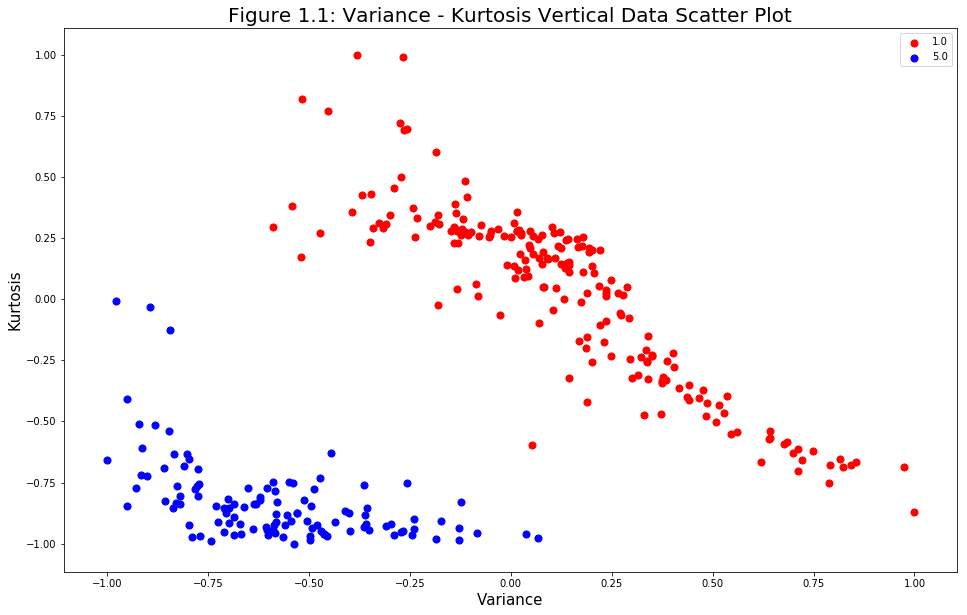

array([[0.        , 1.11567351],
       [1.11567351, 0.        ]])

In [7]:
col_vals = df.iloc[:,1:257].apply(vertical_sum,axis=1)
df[cols] = pd.DataFrame(col_vals.values.tolist(), columns=cols)
df['variance'] = normalize(df.iloc[:,257:273].var(axis=1),-1,1)
df['kurtosis'] = normalize(df.iloc[:,257:273].kurtosis(axis=1),-1,1)

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 1.1: Variance - Kurtosis Vertical Data Scatter Plot',fontsize=20)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)
ax.legend()
plt.show()
fig.savefig('../figures/figure-1_1',dpi=300)

km = KMeans(n_clusters = 2, random_state = 1).fit(df[['variance','kurtosis']])
euclidean_distances(km.cluster_centers_)

## Explained Variance Ratio Calculation

In [8]:
den = df.iloc[:,1:257].var()
(df_pca.pc1.var() + df_pca.pc1.var())/sum(den),(df['variance'].var() + df['kurtosis'].var())/sum(den)

(0.022839148990034443, 0.006094507200352916)

## Logistic Regression with C=0.01 and L2 Regularization

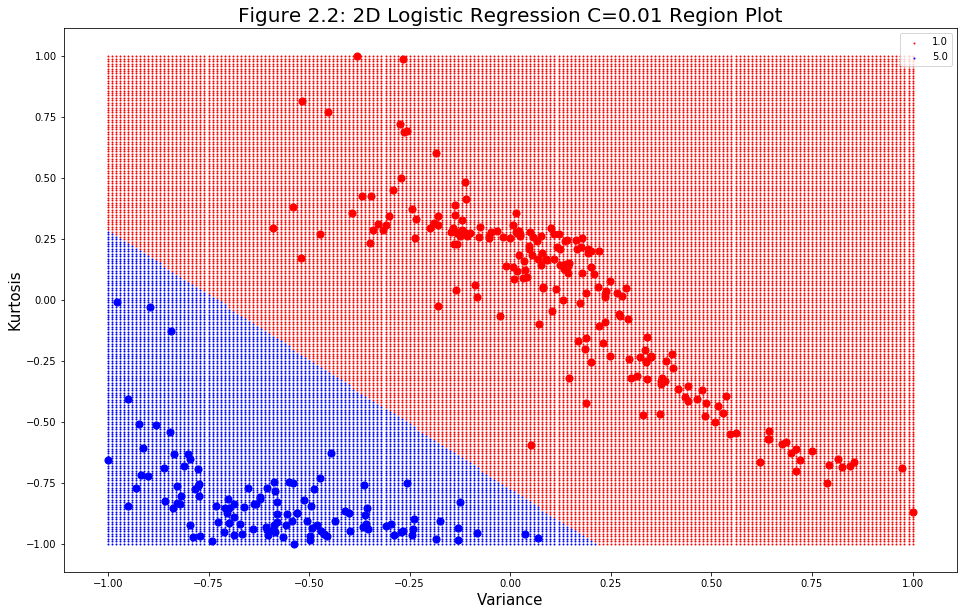

In [9]:
X = df[['kurtosis','variance']]
y = df.num
clf = LogisticRegression(random_state=0, C=0.01).fit(X, y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.2: 2D Logistic Regression C=0.01 Region Plot',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)


plt.show()
fig.savefig('../figures/figure-2_2',dpi=300)

## Logistic Regression with c=2 and L2 Regularization

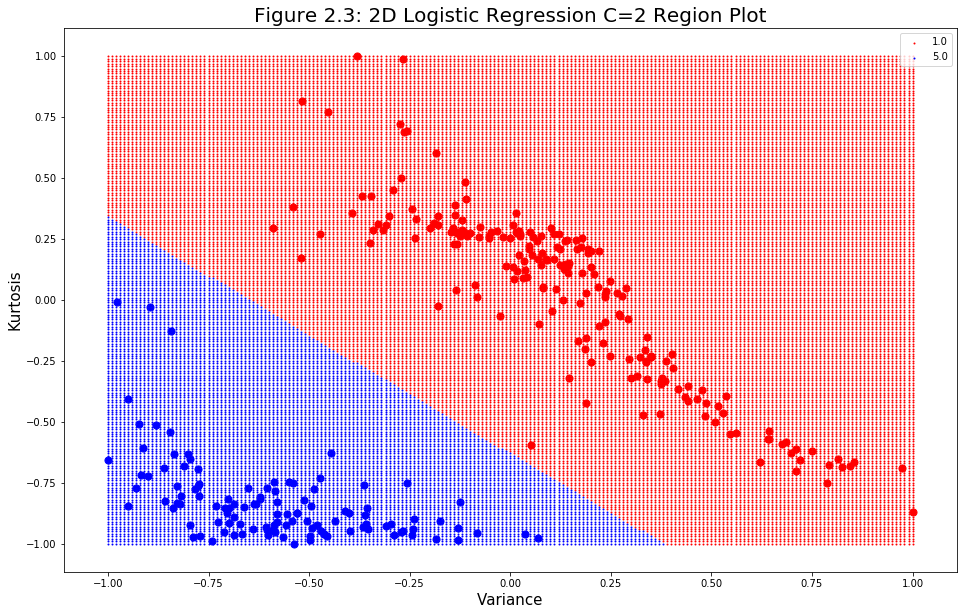

In [10]:
X = df[['variance','kurtosis']]
y = df.num
clf = LogisticRegression(random_state=0, C=2).fit(X, y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.3: 2D Logistic Regression C=2 Region Plot',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

    
plt.show()
fig.savefig('../figures/figure-2_3',dpi=300)

## Figure 2_Extra_3: Logistic Regression with C=0.01 and L1 Regularization

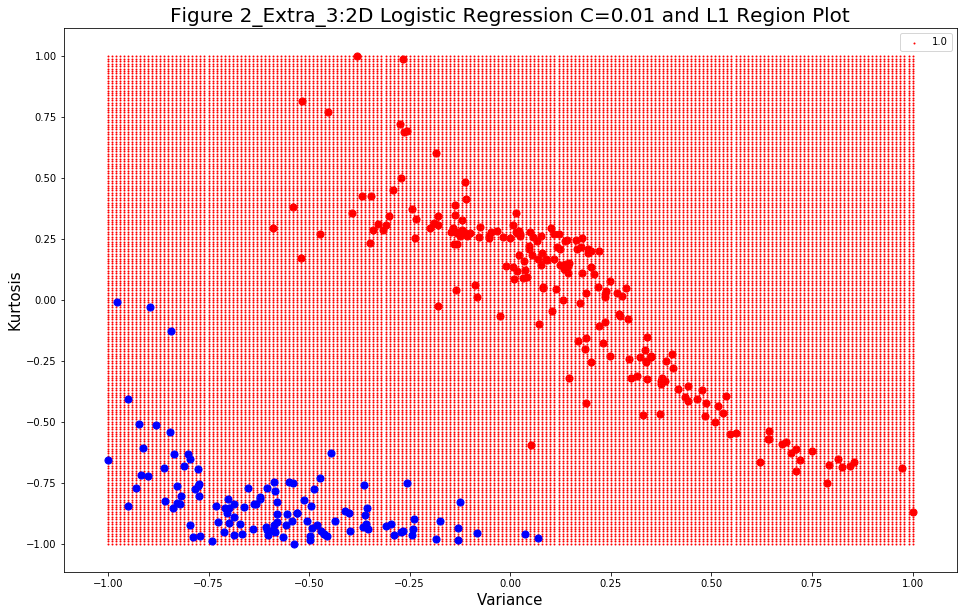

In [11]:
X = df[['kurtosis','variance']]
y = df.num
clf = LogisticRegression(random_state=0, C=0.01,penalty='l1').fit(X, y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2_Extra_3:2D Logistic Regression C=0.01 and L1 Region Plot',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)
    
plt.show()
fig.savefig('../figures/figure-2_Extra_3',dpi=300)

## Figure 2_Extra_4: Logistic Regression with C=2 and L1 Regularization

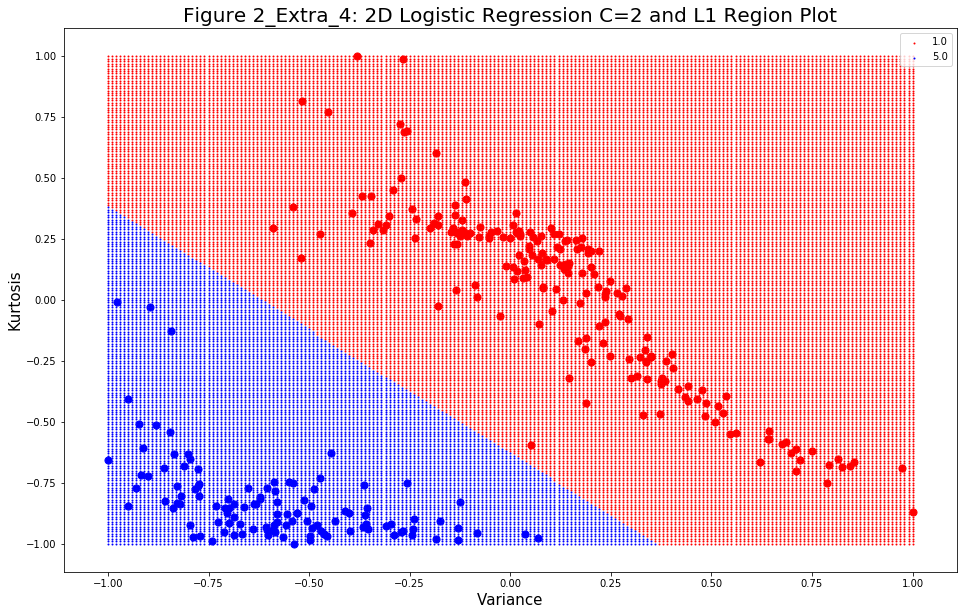

In [12]:
X = df[['kurtosis','variance']]
y = df.num
clf = LogisticRegression(random_state=0, C=2,penalty='l1').fit(X, y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2_Extra_4: 2D Logistic Regression C=2 and L1 Region Plot',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.show()
fig.savefig('../figures/figure-2_Extra_4',dpi=300)

## Figure 2_Extra_1: Logistic Regression L1 Regularization C Vs Cross-Val-Score Plot for 2D Features

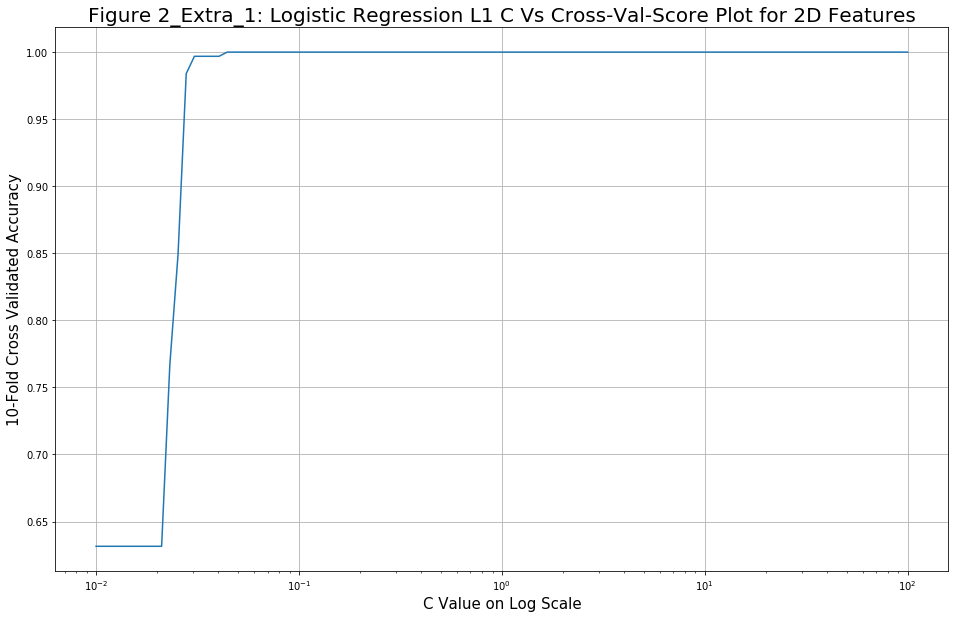

(array([[-1.42714643, -1.38875313]]), 0.044306214575838825)

In [13]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2_Extra_1: Logistic Regression L1 C Vs Cross-Val-Score Plot for 2D Features',fontsize=20)
plt.xlabel('C Value on Log Scale', fontsize=15)
plt.ylabel('10-Fold Cross Validated Accuracy', fontsize=15)

X = df[['kurtosis','variance']]
y = df.num

#x-axis
x_axis = np.logspace(-2, 2, 100, endpoint=True)
y_axis = []
for x in x_axis:
    clf = LogisticRegression(random_state=0, C=x,penalty='l1')
    y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)
    

plt.semilogx(x_axis, y_axis)
plt.grid(True)
plt.show()
fig.savefig('../figures/figure-2_Extra_1',dpi=300)

clf = LogisticRegression(random_state=0, C=x_axis[y_axis.index(max(y_axis))],penalty='l1').fit(X,y)
clf.coef_,x_axis[y_axis.index(max(y_axis))]

## Figure 2_Extra_2: Logistic Regression L2 Regularization C Vs Cross-Val-Score Plot for 2D Features

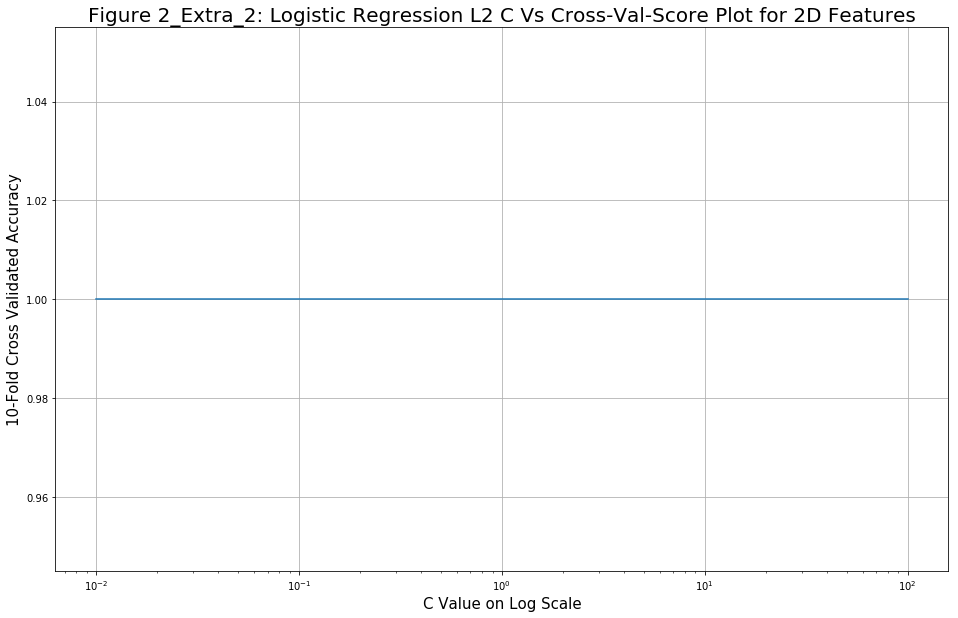

(array([[-0.42236641, -0.39706025]]), 0.01)

In [14]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2_Extra_2: Logistic Regression L2 C Vs Cross-Val-Score Plot for 2D Features',fontsize=20)
plt.xlabel('C Value on Log Scale', fontsize=15)
plt.ylabel('10-Fold Cross Validated Accuracy', fontsize=15)

X = df[['kurtosis','variance']]
y = df.num

#x-axis
x_axis = np.logspace(-2, 2, 100, endpoint=True)
y_axis = []
for x in x_axis:
    clf = LogisticRegression(random_state=0, C=x,penalty='l2')
    y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)
    

plt.semilogx(x_axis, y_axis)
plt.grid(True)
plt.show()
fig.savefig('../figures/figure-2_Extra_2',dpi=300)

clf = LogisticRegression(random_state=0, C=x_axis[y_axis.index(max(y_axis))],penalty='l2').fit(X,y)
clf.coef_,x_axis[y_axis.index(max(y_axis))]

## Figure 2.4 Linear SVM C Vs Cross-Val-Score Plot for 2D Features

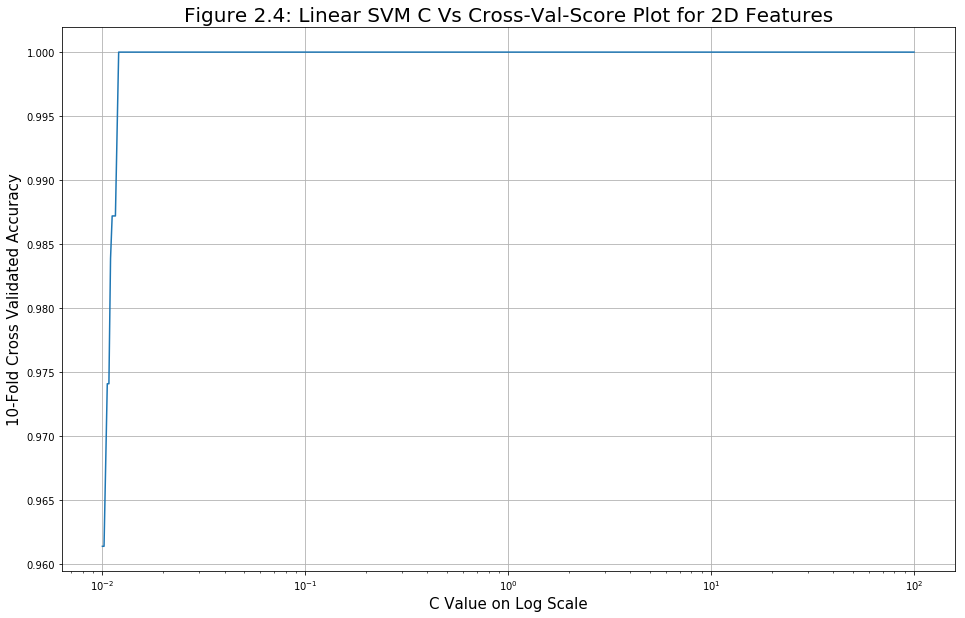

In [15]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.4: Linear SVM C Vs Cross-Val-Score Plot for 2D Features',fontsize=20)
plt.xlabel('C Value on Log Scale', fontsize=15)
plt.ylabel('10-Fold Cross Validated Accuracy', fontsize=15)

X = df[['kurtosis','variance']]
y = df.num

#x-axis
x_axis = np.logspace(-2, 2, 500, endpoint=True)
y_axis = []
for x in x_axis:
    clf = SVC(kernel='linear',C=x)
    y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)
    

plt.semilogx(x_axis, y_axis)
plt.grid(True)
plt.show()
fig.savefig('../figures/figure-2_4',dpi=300)

## Figure 2.6: 2D Best C Linear SVM Region Plot

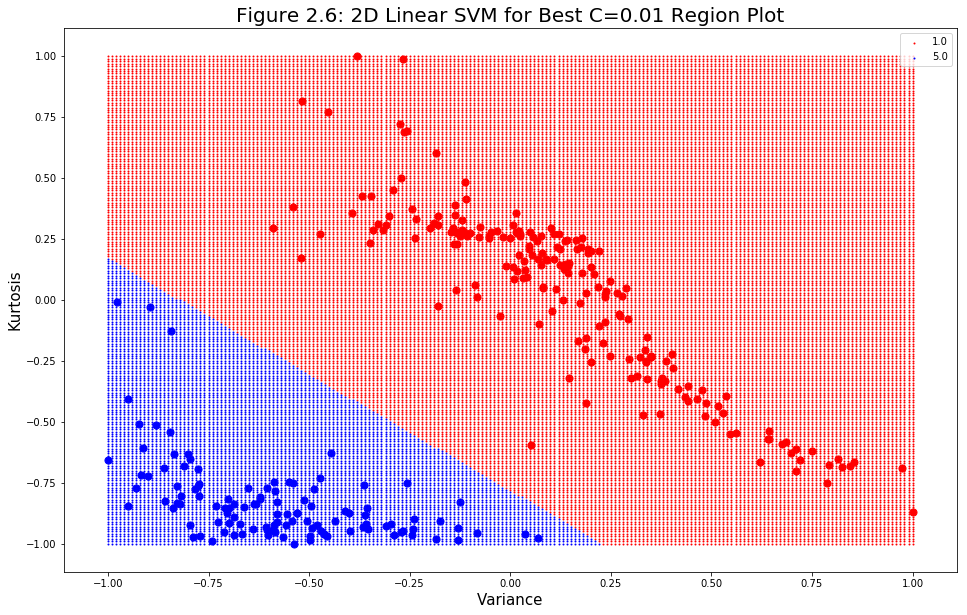

In [16]:
c = x_axis[y_axis.index(max(y_axis))]
clf = SVC(kernel='linear',C=c).fit(X,y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.6: 2D Linear SVM for Best C={} Region Plot'.format(str(c)[:4]),fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.show()
fig.savefig('../figures/figure-2_6',dpi=300)

## Figure 2.5: Linear SVM C Vs Cross-Val-Score Plot for 256D Features

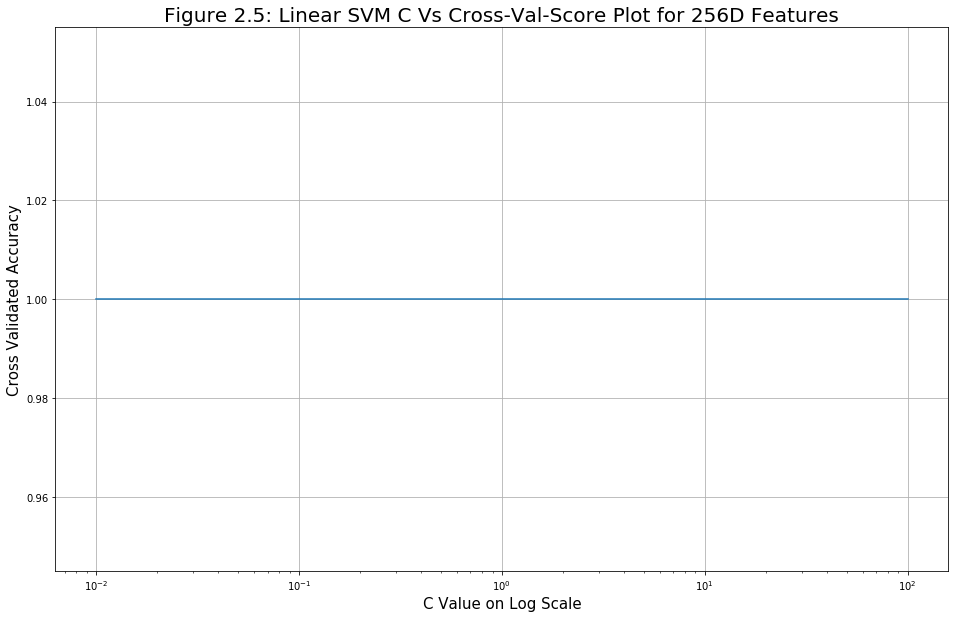

In [17]:
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.5: Linear SVM C Vs Cross-Val-Score Plot for 256D Features',fontsize=20)
plt.xlabel('C Value on Log Scale', fontsize=15)
plt.ylabel('Cross Validated Accuracy', fontsize=15)

X = df.iloc[:,1:257]
y = df.num

#x-axis
x_axis = np.logspace(-2, 2, 500, endpoint=True)
y_axis = []
for x in x_axis:
    clf = SVC(kernel='linear',C=x)
    y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)
    

plt.semilogx(x_axis, y_axis)
plt.grid(True)
plt.show()
fig.savefig('../figures/figure-2_5',dpi=300)

## Cross Val Accuracy for Polynomial Kernel with Degree 2,5,10,20

In [18]:
X = df[['kurtosis','variance']]
y = df.num

degree = [2,5,10,20]
c_val = []
x_axis = np.logspace(-2, 2, 100, endpoint=True)

for d in degree:
    y_axis = []
    for x in x_axis:
        clf = SVC(kernel='poly',C=x,degree=d)
        y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)
        
    c = x_axis[y_axis.index(max(y_axis))]
    c_val.append(c)
    print('Degree:',d,'C:',c,'Accuracy:',max(y_axis))

Degree: 2 C: 4.229242874389499 Accuracy: 1.0
Degree: 5 C: 83.02175681319753 Accuracy: 1.0
Degree: 10 C: 83.02175681319753 Accuracy: 0.9415793010752689
Degree: 20 C: 91.11627561154896 Accuracy: 0.6666263440860216


## Cross Val Accuracy for Polynomial Kernel from Degree 1 to 20

In [19]:
X = df[['kurtosis','variance']]
y = df.num

degree = list(range(1,21))
c_val = []
acc = []
x_axis = np.logspace(-2, 2, 100, endpoint=True)

for d in degree:
    y_axis = []
    for x in x_axis:
        clf = SVC(kernel='poly',C=x,degree=d)
        y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)
        
    c = x_axis[y_axis.index(max(y_axis))]
    c_val.append(c)
    acc.append(max(y_axis))
    print('Degree:',d,'C:',c,'Accuracy:',max(y_axis))

Degree: 1 C: 0.025353644939701114 Accuracy: 1.0
Degree: 2 C: 4.229242874389499 Accuracy: 1.0
Degree: 3 C: 8.902150854450392 Accuracy: 1.0
Degree: 4 C: 20.565123083486537 Accuracy: 1.0
Degree: 5 C: 83.02175681319753 Accuracy: 1.0
Degree: 6 C: 75.64633275546291 Accuracy: 0.9870833333333333
Degree: 7 C: 91.11627561154896 Accuracy: 0.9807325268817204
Degree: 8 C: 100.0 Accuracy: 0.9709475806451613
Degree: 9 C: 91.11627561154896 Accuracy: 0.9676142473118279
Degree: 10 C: 83.02175681319753 Accuracy: 0.9415793010752689
Degree: 11 C: 100.0 Accuracy: 0.8902419354838711
Degree: 12 C: 100.0 Accuracy: 0.8617069892473118
Degree: 13 C: 91.11627561154896 Accuracy: 0.8296236559139786
Degree: 14 C: 100.0 Accuracy: 0.8041061827956989
Degree: 15 C: 91.11627561154896 Accuracy: 0.7785954301075269
Degree: 16 C: 100.0 Accuracy: 0.7531787634408602
Degree: 17 C: 100.0 Accuracy: 0.7277620967741936
Degree: 18 C: 100.0 Accuracy: 0.6983938172043012
Degree: 19 C: 100.0 Accuracy: 0.6825604838709679
Degree: 20 C: 91.

In [20]:
df_out = pd.DataFrame()
df_out['Degree'] = degree
df_out['C Value'] = c_val
df_out['Cross Validation Accuracy'] = acc
df_out['Cross Validation Accuracy'] = df_out['Cross Validation Accuracy'].round(4)
decimals = pd.Series([4, 4], index=['Cross Validation Accuracy', 'C Value'])
df_out = df_out.round(decimals)
df_out.to_excel('../out_data/degree_vs_c.xlsx')

## Figure 2.7: Plot of Best Polynomial Kernel SVM - Degree = 1, C=0.5

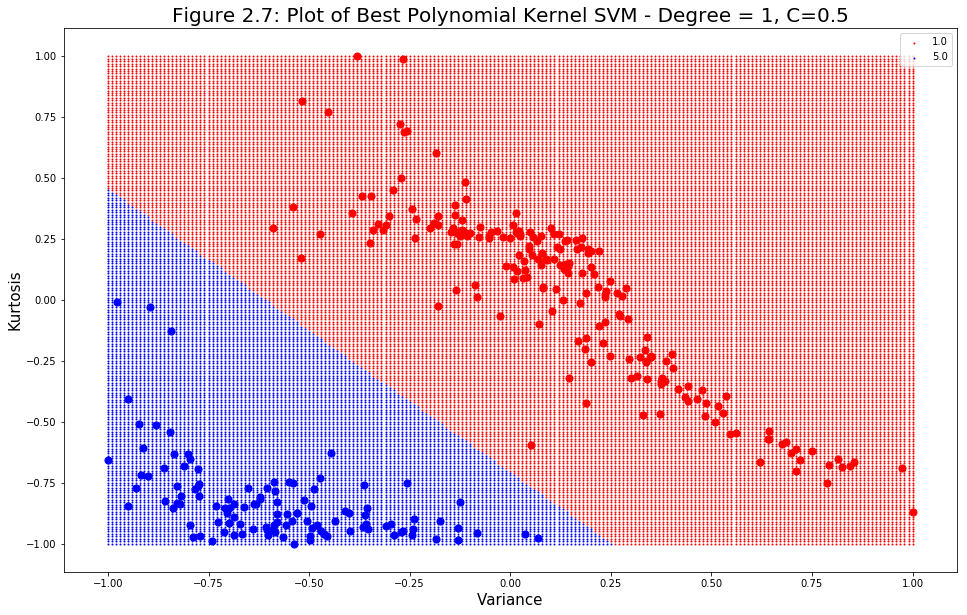

In [21]:
X = df[['kurtosis','variance']]
y = df.num

clf = SVC(kernel='poly',C=0.5,degree=1).fit(X,y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.7: Plot of Best Polynomial Kernel SVM - Degree = 1, C=0.5',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.show()
fig.savefig('../figures/figure-2_7',dpi=300)

## Figure 2.8: Overfitting Polynomial Kernel SVM Region Plot - Degree = 2, C=100

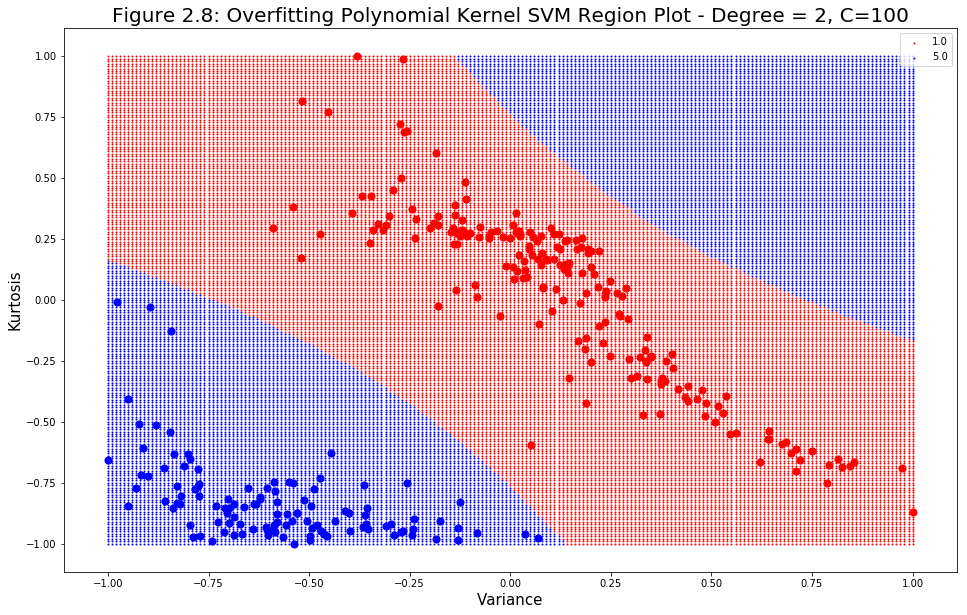

Cross Val Score for this Model: 1.0


In [22]:
X = df[['kurtosis','variance']]
y = df.num
clf = SVC(kernel='poly',C=100,degree=2).fit(X,y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.8: Overfitting Polynomial Kernel SVM Region Plot - Degree = 2, C=100',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.show()
fig.savefig('../figures/figure-2_8',dpi=300)
print('Cross Val Score for this Model:',sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)

## Figure 2.9: Underfitting Polynomial Kernel SVM Region Plot - Degree = 1, C=0.02

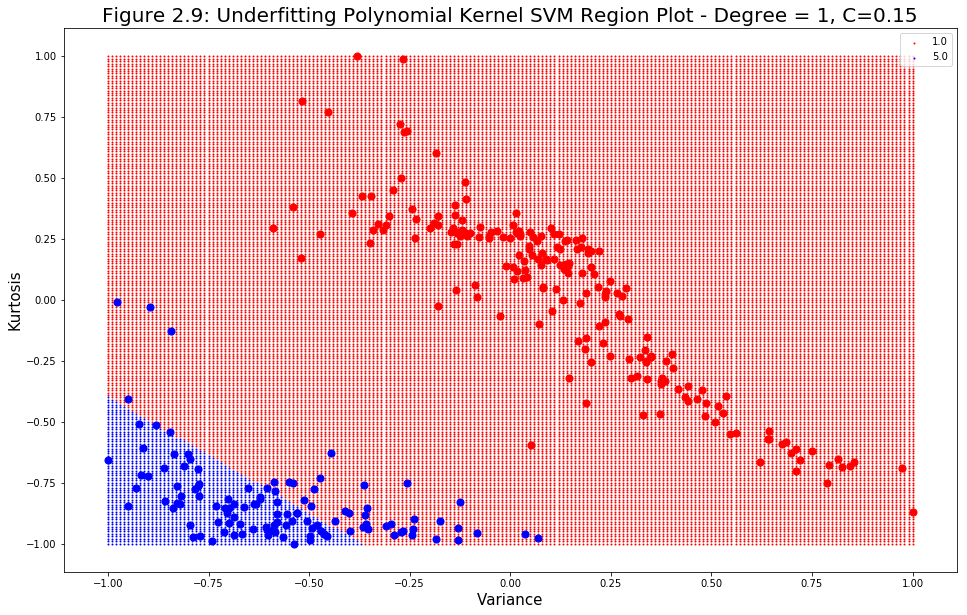

Cross Val Score for this Model: 0.7149529569892474


In [23]:
X = df[['kurtosis','variance']]
y = df.num
clf = SVC(kernel='poly',C=0.015,degree=1).fit(X,y)

xPred = []
yPred = []
cPred = []
for xP in range(-100,101):
    xP = xP/100.0
    for yP in range(-100,101):
        yP = yP/100.0
        xPred.append(xP)
        yPred.append(yP)
        cPred.append(clf.predict([[xP,yP]])[0])
        
scatter_x = np.array(xPred)
scatter_y = np.array(yPred)
group = np.array(cPred)
cdict = {1.0: 'red', 5.0: 'blue'}
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.9: Underfitting Polynomial Kernel SVM Region Plot - Degree = 1, C=0.15',fontsize=20)
plt.xlabel('Variance', fontsize=15)
plt.ylabel('Kurtosis', fontsize=15)

for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 1)

ax.legend()

scatter_x = np.array(df['variance'])
scatter_y = np.array(df['kurtosis'])
group = np.array(df.num)
    
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 50)

plt.show()
fig.savefig('../figures/figure-2_9',dpi=300)
print('Cross Val Score for this Model:',sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)

## Figure 2.10: Radial Kernel SVM Gamma Vs Cross Val Score Plot for 2D Features

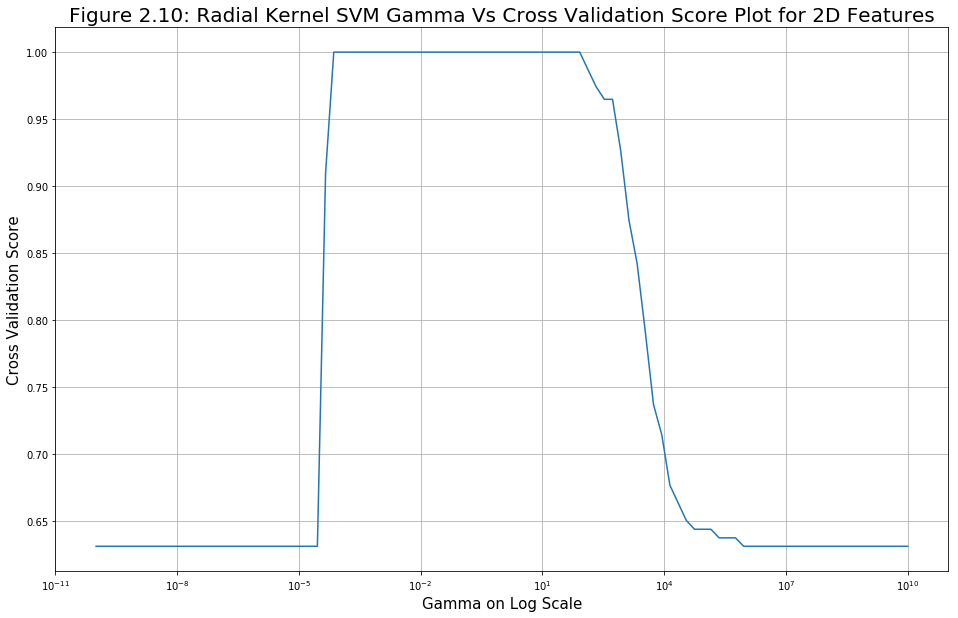

In [24]:
X = df[['kurtosis','variance']]
y = df.num

x_axis = np.logspace(-2, 2, 100, endpoint=True)
gamma = np.logspace(-10, 10, 100, endpoint=True)

c_val = []
acc = []
df_out = pd.DataFrame()

for g in gamma:
    y_axis = []
    for x in x_axis:
        clf = SVC(kernel='rbf',C=x,gamma=g)
        y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)

    c = x_axis[y_axis.index(max(y_axis))]
    c_val.append(c)
    acc.append(max(y_axis))

df_out['C Value'] = c_val
df_out['Cross Validation Accuracy'] = acc
df_out['Gamma'] = gamma
decimals = pd.Series([4, 4], index=['Cross Validation Accuracy', 'C Value'])
df_out = df_out.round(decimals)
df_out.to_excel(('../out_data/rbf_c_vs_gamma.xlsx'))

fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(10)
ax.set_title('Figure 2.10: Radial Kernel SVM Gamma Vs Cross Validation Score Plot for 2D Features',fontsize=20)
plt.xlabel('Gamma on Log Scale', fontsize=15)
plt.ylabel('Cross Validation Score', fontsize=15)


x_axis = df_out['Gamma']
y_axis = df_out['Cross Validation Accuracy']


plt.semilogx(x_axis, y_axis)
plt.grid(True)
plt.show()
fig.savefig('../figures/figure-2_10',dpi=300)

## Polynomial Kernel SVM Degree Vs Gamma Vs C Plot for 2D Features

In [25]:
X = df[['kurtosis','variance']]
y = df.num

degree = [1,2,5,10]

x_axis = np.logspace(-2, 2, 50, endpoint=True)
gamma = np.logspace(-2, 2, 50, endpoint=True)

df_out = pd.DataFrame()

for g in gamma:
    c_val = []
    acc = []
    df_temp = pd.DataFrame()
    for d in degree:
        y_axis = []
        for x in x_axis:
            clf = SVC(kernel='poly',C=x,degree=d,gamma=g)
            y_axis.append(sum(cross_val_score(clf, X, y, cv=10,scoring='accuracy'))/10)

        c = x_axis[y_axis.index(max(y_axis))]
        c_val.append(c)
        acc.append(max(y_axis))
#         print('Gamma:',g,'Degree:',d,'C:',c,'Accuracy:',max(y_axis))
        
    df_temp['Degree'] = degree
    df_temp['C Value'] = c_val
    df_temp['Cross Validation Accuracy'] = acc
    df_temp['Gamma'] = len(df_temp) * [g]
    decimals = pd.Series([4, 4], index=['Cross Validation Accuracy', 'C Value'])
    df_temp = df_temp.round(decimals)
    df_out = df_out.append(df_temp)
    
df_out.sort_values(ascending=True,by=['Degree','Gamma'],inplace=True)
df_out.to_excel(('../out_data/poly_c_vs_gamma.xlsx'))